In [6]:
#import all the required libraries.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter
# Importing the dataset
data_df = pd.read_csv('C:/Users/Adinath/Desktop/Data_Science/Assignments/Multi Lenear regression/ToyotaCorolla.csv',encoding= 'unicode_escape')
data_df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [7]:
# Count the number of records in each column.
data_df.count()

Id                  1436
Model               1436
Price               1436
Age_08_04           1436
Mfg_Month           1436
Mfg_Year            1436
KM                  1436
Fuel_Type           1436
HP                  1436
Met_Color           1436
Color               1436
Automatic           1436
cc                  1436
Doors               1436
Cylinders           1436
Gears               1436
Quarterly_Tax       1436
Weight              1436
Mfr_Guarantee       1436
BOVAG_Guarantee     1436
Guarantee_Period    1436
ABS                 1436
Airbag_1            1436
Airbag_2            1436
Airco               1436
Automatic_airco     1436
Boardcomputer       1436
CD_Player           1436
Central_Lock        1436
Powered_Windows     1436
Power_Steering      1436
Radio               1436
Mistlamps           1436
Sport_Model         1436
Backseat_Divider    1436
Metallic_Rim        1436
Radio_cassette      1436
Tow_Bar             1436
dtype: int64

In [8]:
# Check the stats of the data
data_df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data Processing and Visualisation

In [9]:
# Check if there is any null value in the dataset.
data_df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

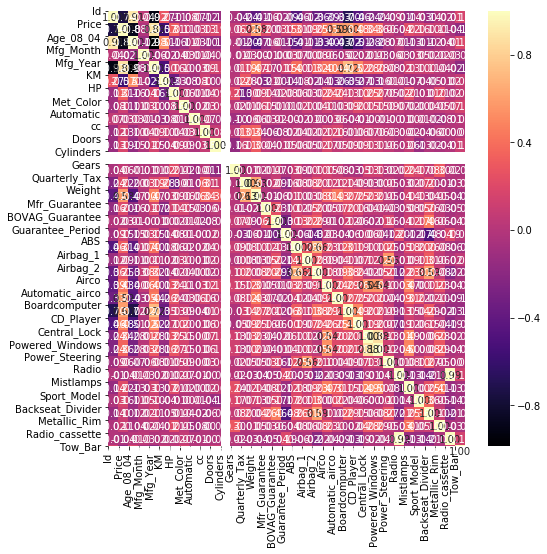

In [11]:
# Check Correlation amoung parameters
corr = data_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
# Generate a heatmap
sns.heatmap(corr, cmap = 'magma', annot = True, fmt = ".2f")
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

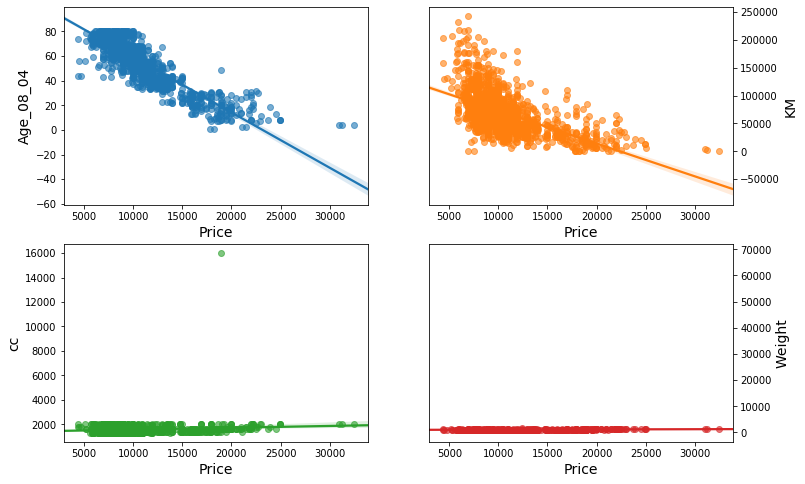

In [14]:
# plot regplots  for Age, KM, CC & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age_08_04', data = data_df, ax = axes[0,0], scatter_kws={'alpha':0.6})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age_08_04', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = data_df, ax = axes[0,1], scatter_kws={'alpha':0.6})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'cc', data = data_df, ax = axes[1,0], scatter_kws={'alpha':0.6})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('cc', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = data_df, ax = axes[1,1], scatter_kws={'alpha':0.6})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

In [16]:
# Create the clasiification.
data_df = pd.get_dummies(data_df)
data_df.head()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Color_Beige,Color_Black,Color_Blue,Color_Green,Color_Grey,Color_Red,Color_Silver,Color_Violet,Color_White,Color_Yellow
0,1,13500,23,10,2002,46986,90,1,0,2000,...,0,0,1,0,0,0,0,0,0,0
1,2,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,0,0,0,1,0,0,0
2,3,13950,24,9,2002,41711,90,1,0,2000,...,0,0,1,0,0,0,0,0,0,0
3,4,14950,26,7,2002,48000,90,0,0,2000,...,0,1,0,0,0,0,0,0,0,0
4,5,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,0,0,0,0,0,0,0


Regression Models

In [18]:
#Simple Linear Regression
from sklearn.linear_model import LinearRegression
#Lets see how does our model perform if we have consider only one independent variable(Age) to predict the price.

In [20]:
X_simple_lreg = data_df[["Age_08_04"]].values
y_simple_lreg = data_df["Price"].values
print(X_simple_lreg[0:5])
print(y_simple_lreg[0:5])

[[23]
 [23]
 [24]
 [26]
 [30]]
[13500 13750 13950 14950 13750]


In [21]:
# Create train test dataset
from sklearn.model_selection import train_test_split
X_train_slreg, X_test_slreg, y_train_slreg, y_test_slreg = train_test_split(X_simple_lreg,y_simple_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_slreg.shape, y_train_slreg.shape)
print('Test Dataset : ', X_test_slreg.shape, y_test_slreg.shape)

Train Dataset :  (1077, 1) (1077,)
Test Dataset :  (359, 1) (359,)


In [22]:
simple_lreg = LinearRegression()
simple_lreg.fit(X_train_slreg, y_train_slreg)
print('Intercept : ', simple_lreg.intercept_)
print('Slope : ', simple_lreg.coef_)

Intercept :  20137.410273159752
Slope :  [-169.09157285]


In [23]:
#As we can see, the slope is -169.09, which means that price of the vehicle is highly impacted by the age of the vehicle. However, it is negatively propotional to Price.
# Use the model to predict the test dataset.
y_simplelreg_pred_test = simple_lreg.predict(X_test_slreg)

# Use the model to predict the train dataset.
y_simplelreg_pred_train = simple_lreg.predict(X_train_slreg)

In [24]:
from sklearn.metrics import r2_score
r2_score_slreg_train = r2_score(y_simplelreg_pred_train, y_train_slreg)
r2_score_slreg_test = r2_score(y_simplelreg_pred_test, y_test_slreg)
rmse_slreg = np.sqrt(mean_squared_error(y_simplelreg_pred_test, y_test_slreg)**2)
print('r2_ score for train dataset for simple linear reg : ', r2_score_slreg_train)
print('r2_ score for test dataset for simple linear reg : ', r2_score_slreg_test)
print('root mean squared error for simple linear reg : ', rmse_slreg)

r2_ score for train dataset for simple linear reg :  0.6978153650611345
r2_ score for test dataset for simple linear reg :  0.6734388905656996
root mean squared error for simple linear reg :  3438902.3311535786


Multiple Regression

In [25]:
#Multiple Regression
#Let us include some more independent variables to predict the price of the vehicle.
# Separating the independent and dependent variable.
X_multi_lreg = data_df.drop('Price', axis = 1).values
y_multi_lreg = data_df["Price"].values.reshape(-1,1)

In [26]:
from sklearn.model_selection import train_test_split
X_train_mlreg, X_test_mlreg, y_train_mlreg, y_test_mlreg = train_test_split(X_multi_lreg,y_multi_lreg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_mlreg.shape, y_train_mlreg.shape)
print('Test Dataset : ', X_test_mlreg.shape, y_test_mlreg.shape)

Train Dataset :  (1077, 419) (1077, 1)
Test Dataset :  (359, 419) (359, 1)


In [27]:
multi_lreg = LinearRegression()
multi_lreg.fit(X_train_mlreg, y_train_mlreg)
print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_)

Intercept :  [1.77957231e+11]
Slope :  [[-6.61155791e-01 -7.39738551e+06 -7.39737607e+06 -8.87677798e+07
  -1.80160022e-02  1.90622163e+02 -8.62319807e+01  2.60805724e+04
  -3.05832953e+01  9.22339570e+02 -3.55370093e+03  4.08907427e+03
  -2.65917282e+00  1.44417535e+01  2.52893955e+02  6.50987399e+02
   7.35090857e+01 -4.22917125e+01 -9.90286032e+01 -6.55333589e+01
   2.67500061e+02  1.55125985e+04 -5.01356192e+02  1.61048607e+02
   2.90222193e+02 -1.09699536e+01 -2.68789072e+02  8.48572473e+02
   6.31005286e+01 -1.19351655e+02  9.11909844e+01  8.26891924e+01
  -9.98119531e+02 -5.33349258e+01  4.88150815e+02  6.66836341e+02
   1.59796538e+02  1.00149228e+02 -1.29918881e+03 -2.44511972e+02
  -9.13883751e+02 -2.57831266e+04 -3.08542106e+02 -2.58276719e+04
  -7.53237691e+02 -1.52208743e+03 -6.11862381e+02 -1.77717162e+03
  -2.08674029e+03 -2.23162563e+03 -2.75488481e+04 -2.09181536e+03
   2.94453858e+01  1.75891280e+03 -2.35350208e+03 -8.04185026e+02
  -2.69891855e+04  1.32045663e+02 -1.

In [28]:
# Use the model to predict the test dataset.
y_mlreg_pred_test = multi_lreg.predict(X_test_mlreg)

# Use the model to predict the train dataset.
y_mlreg_pred_train = multi_lreg.predict(X_train_mlreg)

In [29]:
# Have a look at the predicted & actual values.
print(y_mlreg_pred_test[0:5])
print(y_test[0:5])

print(y_mlreg_pred_train[0:5])
print(y_train[0:5])

[[ 7106.74423218]
 [ 9121.41027832]
 [ 9467.65228271]
 [ 9964.01956177]
 [11850.26858521]]


NameError: name 'y_test' is not defined

In [30]:
# Calculate the eualuation metrics of the model.
from sklearn.metrics import r2_score
r2_score_mlreg_train = r2_score(y_mlreg_pred_train, y_train_mlreg)
r2_score_mlreg_test = r2_score(y_mlreg_pred_test, y_test_mlreg)
rmse_mlreg = np.sqrt(mean_squared_error(y_mlreg_pred_test, y_test_mlreg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_mlreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg_test)
print('root mean squared error for multi linear reg : ', rmse_mlreg)

r2_ score for train dataset for multi linear reg :  0.9624664355700187
r2_ score for test dataset for multi linear reg :  0.35921181127982116
root mean squared error for multi linear reg :  32788822.259295143


In [31]:
#As we can see that using multiple independent variables we can improve the accuracy of the model.